In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Activation, Dropout,Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Lambda, Input, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model, Sequential
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
import shutil
import cv2
from tensorflow.keras.preprocessing import image
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

In [3]:
from google.colab import drive
drive.mount('/content/drive')
img = image.load_img("/content/drive/MyDrive/chest_xray/train/NORMAL/NORMAL2-IM-0931-0001.jpeg")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


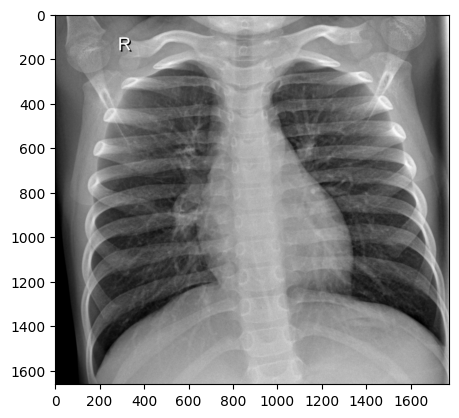

In [4]:
plt.imshow(img)

In [5]:
# Data directories
train_data_dir = '/content/drive/MyDrive/chest_xray/train'
validation_data_dir = '/content/drive/MyDrive/chest_xray/val'
test_data_dir = '/content/drive/MyDrive/chest_xray/test'

In [6]:
# Image dimensions and batch size
img_width, img_height = 224, 224
batch_size = 32


In [7]:
# Data augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

In [8]:
# Data generator for training, validation, and testing
train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

validation_generator = train_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = train_datagen.flow_from_directory(
    test_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary'
)

Found 5225 images belonging to 2 classes.
Found 16 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [9]:
#Load a pre-trained VGG16 model without the top (fully connected) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_width, img_height, 3))

# Add custom top layers for binary classification
x = base_model.output
x = Flatten()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

In [10]:
# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=5,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size
)

Epoch 1/5
163/163 [==============================] - 718s 4s/step - loss: 0.7156 - accuracy: 0.7244
Epoch 2/5
163/163 [==============================] - 155s 952ms/step - loss: 0.6984 - accuracy: 0.7606
Epoch 3/5
163/163 [==============================] - 153s 938ms/step - loss: 0.5814 - accuracy: 0.7391
Epoch 4/5
163/163 [==============================] - 146s 897ms/step - loss: 0.5732 - accuracy: 0.7423
Epoch 5/5
163/163 [==============================] - 146s 893ms/step - loss: 0.5748 - accuracy: 0.7416


In [11]:
# Evaluate the model on the test set
test_loss, test_acc = model.evaluate(test_generator, steps=test_generator.samples // batch_size)
print(f"Test accuracy: {test_acc}")


19/19 [==============================] - 120s 7s/step - loss: 0.6680 - accuracy: 0.6266
Test accuracy: 0.6266447305679321
